# Bag Of Words

In [1]:
import codecs
import pandas as pd

from konlpy.tag import Okt as Twitter
from sklearn.feature_extraction.text import CountVectorizer

import torch
import torch.nn as nn
import torch.utils.data as Data

import numpy as np
import random

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = codecs.open('data/reviews.txt', 'r', 'utf-8')
f.read()[:500]

'# G마켓에 좋은 평만 있어서 사봤는데.. 정말 진짜 진짜 사지마세요. 개. 쓰. 레. 기 (진심) 입니다. 액정부터 짜증나는 TN패널에, 하드 SSD인걸로 알았는데, 속도는 저질 SD카드 꽂아 놓은것 같습니다. 정말 느려터집니다. 저는 단지 인터넷 뱅킹만 할려고, 샀단 말입니다. 그런데 인터넷 뱅킹 프로그램까는데만 10~20분 걸립니다. 뭐약!! 이게!! 분노로 인해 볼때마다 짜증납니다. 밤에 잠도 안오고요.. 사시면 분명 후회하실겁니다. 아! 진짜 G마켓 프리미엄평으로 실날하게 사진찍어서 올리려고했는데, 먹고 산다고 바빠서 프리미엄 평 못 올린게 정말 천추의 한이네요!!\n# 원래 그런 줄 알고 사는 "저가 제품"이라고 생각합니다만. IPS라는 언급이 없으니 당연히 TN 패널일 테고, EMMC는 SSD가 아니고 SD 카드 내장된 것 같은 것이라 원래 SSD보다 느린 것이고, CPU도 아톰이니 뭐 당연히 느리죠. 그런 것 다 감안하고 "싸고 가볍다"는 조건으로 사는 제품인데요. 뭐 '

# Extract Sentences

In [3]:
keywords = ['발열', '소음']

for keyword in keywords:
    temp_list = []
    save_name = 'data/reviews_' + keyword + '.txt'
    f = codecs.open('data/reviews.txt', 'r', 'utf-8')
    t = codecs.open(save_name, 'w', 'utf-8')
    
    while True:
        line = f.readline()
        if not line: break
        if keyword in line:
            temp_list.append(line)
    set_list = list(set(temp_list))
    
    for item in set_list:
        t.write(item)
        
    f.close()
    t.close()

In [4]:
f = codecs.open('data/reviews_발열.txt', 'r', 'utf-8')
f.read()[:500]

'# 오랫동안 고민하면서 하판이나 베젤 마감불량이 있다는 블로그글을 보고 걱정했었는데, 불량 부분도 없고, 전 제품부터 단점이라고 하던 발열부분도 걱정이 많았는데, 게임은 아예 안하고 사진찍은거 보정이나 하고 인터넷정도 하는수준이라 발열도 거의 없네요. 대체적으로 생각했던것보다 훨씬 더 만족스럽습니다\n# 집에서 간단히 사용할 노트북 찾다가 최종적으로 삼성제품으로 구매 했습닏. 윈도우 10 설치해서 사용하는데 전체적으로 만족스럽습니다. 속도도 잘나오고 화이트 색상이라서 디자인도 이쁘고 좋네요~ 역시 삼성제품이라서 믿고 구매했습니다. 키보드 감도 좋고 발열량도 없어요 사용해보고 용량 부족하면 HDD 장착할려고 합니다. 업그레이드 하기도 편리하게 되어있네요`~~\n# 일단 사용 중에 제품이 키보드 왼쪽 상단이 엄청 뜨겁습니다. 발열을 전혀 잡지 못하는 것 같습니다. 또한 스톰북 14 PRO를 켜고 사용하는 중에 화면의 깜박거림이 발생하였습니다. 증상이 틀어놓은 팟캐스트 방송의 작동이 자꾸 중'

# Load Scored Data

In [5]:
filename = 'data/score_발열.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(filename, sheet_name=sheet_name, header=0)

csv_data = [item.replace('#', '').strip() for item in data['Review']]
csv_label = data['Score']

In [6]:
csv_data

['발열히 심한거 같은데 여름이라 그런가?..',
 '발열이좀 심한거 같아서 걱정이에요',
 '발열이심하더라구요',
 '발열이너무심한게 제일큰 단점인것 같고 그외에 불편한점은',
 '발열이...정말...심합니다',
 '발열이 확실히 심해요',
 '발열이 크지만 노트북 전용 쿨러 사용으로 크게',
 '발열이 최악이네요',
 '발열이 진짜 너무 심하다는게 단점 ㅠㅠㅠ',
 '발열이 좀많이있어서 장시간 높은 램사용율의 프로그램은',
 '발열이 좀 심합니다',
 '발열이 좀 심한편입니다',
 '발열이 좀 심한데.... 줄이려면 밧데리 cpu 사용량',
 '발열이 좀 심한것 빼고 다 괜찮은것 같아요',
 '발열이 좀 심한 느낌이에요',
 '발열이 좀 심하다고 하지만 제가사용하던 10년된 노트북',
 '발열이 좀 심하고 자판이 좀 헐거운 느낌입니다',
 '발열이 조금 심해요',
 '발열이 조금 심한편인거 같아요',
 '발열이 조금 심하네요',
 '발열이 조금 심하나 속도 및 사용성이 매우 좋네요',
 '발열이 정말 심한거말고는 정말 좋습니다',
 '발열이 이전 사용하던 것보다 뜨겁네요',
 '발열이 어마어마합니다',
 '발열이 심했는데, 이건 가볍고 조용해서 마음에 듭니다',
 '발열이 심했고웹서핑 2분만에 펜돌아가고 해서불량인가 의',
 '발열이 심해지고 ㅠ 갑자기 꺼지는 상황이 생기니 당황스',
 '발열이 심해지고 소리가 나는데 Omen은 그런 부분에서',
 '발열이 심해요',
 '발열이 심해선지 와이파이 문젠지 인강이 자꾸 끊기네요',
 '발열이 심해서, 쿨러가 파도치는 것처럼 돌아갔습니다',
 '발열이 심해서 쿨러 함께 쓰는게 좋은거 같아요',
 '발열이 심해서 약간의 단점이 있지만 울트라북의 특성이라',
 '발열이 심해서 노트북은 다 그런가보다....했는데..',
 '발열이 심해서 꼭 쿨러가 있어야 할 것 같네용 안에 팬',
 '발열이 심해서 그런지 게임 돌릴때도 이 정도 성능이라면',
 '발열이 심해 팬이 막 도는지 이런게 개개인이 다르게 느',
 '발열이 심

In [8]:
csv_label

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
1181    0
1182    0
1183    0
1184    0
1185    0
1186    0
1187    0
1188    0
1189    0
1190    0
1191    0
1192    0
1193    0
1194    0
1195    0
1196    0
1197    0
1198    0
1199    0
1200    0
1201    0
1202    0
1203    0
1204    0
1205    0
1206    0
1207    0
1208    0
1209    0
1210    0
Name: Score, Length: 1211, dtype: int64

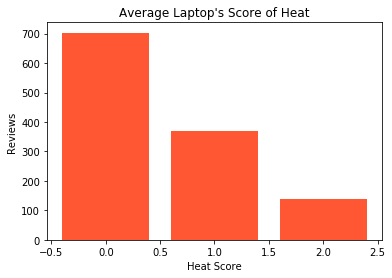

In [9]:
scores = [sum(csv_label == 0), sum(csv_label == 1), sum(csv_label == 2)]

plt.bar(range(len(scores)), scores, color='#ff5733')

plt.title("Average Laptop's Score of Heat")
plt.xlabel("Heat Score")
plt.ylabel("Reviews")

plt.show()

# Bag Of Words

In [10]:
twitter = Twitter()
doc = []

for sentence in csv_data:
    results = []
    tokens = twitter.pos(sentence, norm=True, stem=True)
    
    for token in tokens:
        if not token[1] in ["Josa", "Eomi", "Punctuation"]:
            results.append(token[0])
    doc.append(" ".join(results).strip())

In [11]:
doc[:5]

['발열 히 심하다 같다 여름 그 런가',
 '발열 이 좀 심하다 같다 걱정',
 '발열 심하다',
 '발열 이 너 무심하다 제일 크다 단점 것 같다 그 외 불편하다 점',
 '발열 정말 심하다']

In [12]:
cnv = CountVectorizer(ngram_range=(1, 1), min_df=3)
data = cnv.fit_transform(doc).toarray()
label = csv_label.values

In [14]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
label

array([2, 2, 2, ..., 0, 0, 0])

In [16]:
cnv.vocabulary_

{'발열': 112,
 '심하다': 156,
 '같다': 13,
 '여름': 187,
 '걱정': 16,
 '무심하다': 104,
 '크다': 266,
 '단점': 57,
 '불편하다': 125,
 '정말': 237,
 '확실하다': 292,
 '심해': 157,
 '노트북': 45,
 '쿨러': 263,
 '사용': 134,
 '크게': 265,
 '진짜': 250,
 '너무': 43,
 '많이': 93,
 '있다': 218,
 '장시간': 228,
 '높다': 47,
 '프로그램': 275,
 '한편': 283,
 '이다': 204,
 '심다': 155,
 '밧데리': 113,
 'cpu': 4,
 '용량': 200,
 '빼다': 131,
 '괜찮다': 22,
 '느낌': 50,
 '하지만': 281,
 '자판': 221,
 '조금': 241,
 '속도': 149,
 '매우': 94,
 '좋다': 244,
 '이전': 211,
 '하다': 279,
 '뜨겁다': 83,
 '가볍다': 10,
 '조용하다': 242,
 '마음': 88,
 '듭니': 72,
 '돌아가다': 65,
 '불량': 124,
 '심해지다': 158,
 '생기다': 141,
 '소리': 147,
 '나다': 38,
 '그렇다': 31,
 '부분': 122,
 '문제': 107,
 '끊기다': 37,
 '쓰다': 160,
 '약간': 175,
 '게임': 18,
 '돌리다': 64,
 '정도': 236,
 '성능': 145,
 '라면': 85,
 '지다': 249,
 '이렇다': 206,
 '부팅': 123,
 '화상': 289,
 '원래': 202,
 '모르다': 100,
 '않다': 171,
 '구매': 24,
 '신분': 154,
 '야하다': 174,
 '제외': 239,
 '자주': 220,
 '발생': 111,
 '삼성': 137,
 '소음': 148,
 '치다': 259,
 '만족하다': 91,
 '배터리': 116,
 '빠르다': 128,
 '무엇': 105,
 '생각': 

# Train Test Split

In [17]:
dim = len(cnv.vocabulary_)

In [18]:
dim

295

In [19]:
train_data, test_data, train_label, test_label = train_test_split(data, label, stratify = label)
print(len(train_data))
print(len(test_data))

908
303


In [20]:
x = torch.from_numpy(train_data).type(torch.FloatTensor)
y = torch.from_numpy(train_label).type(torch.LongTensor)

In [21]:
x.size(), y.size()

(torch.Size([908, 295]), torch.Size([908]))

In [22]:
train_data = Data.TensorDataset(x, y)
batch_size = 10
train_loader = Data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)

# Define and Train Model

In [23]:
linear1 = nn.Linear(dim, 200, bias=True)
linear2 = nn.Linear(200, 3, bias=True)
relu = nn.ReLU()

model = nn.Sequential(linear1, relu, linear2)

In [25]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
num_epochs = 50

In [27]:
for epoch in range(num_epochs):
    total_batch = len(train_data) // batch_size
    
    for i, (batch_text, batch_labels) in enumerate(train_loader):
        X = batch_text.view(-1, dim)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i + 1) % 20 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, i + 1, total_batch, cost.item()))
print("Learning Finished!")

Epoch [1/50], Iter [20/90], Loss: 1.0638
Epoch [1/50], Iter [40/90], Loss: 0.6281
Epoch [1/50], Iter [60/90], Loss: 0.8759
Epoch [1/50], Iter [80/90], Loss: 0.7829
Epoch [2/50], Iter [20/90], Loss: 0.8610
Epoch [2/50], Iter [40/90], Loss: 0.7045
Epoch [2/50], Iter [60/90], Loss: 0.4918
Epoch [2/50], Iter [80/90], Loss: 0.8102
Epoch [3/50], Iter [20/90], Loss: 0.4297
Epoch [3/50], Iter [40/90], Loss: 0.4456
Epoch [3/50], Iter [60/90], Loss: 0.2219
Epoch [3/50], Iter [80/90], Loss: 0.4068
Epoch [4/50], Iter [20/90], Loss: 0.2506
Epoch [4/50], Iter [40/90], Loss: 0.2547
Epoch [4/50], Iter [60/90], Loss: 0.1708
Epoch [4/50], Iter [80/90], Loss: 0.1006
Epoch [5/50], Iter [20/90], Loss: 0.1986
Epoch [5/50], Iter [40/90], Loss: 0.1824
Epoch [5/50], Iter [60/90], Loss: 0.1335
Epoch [5/50], Iter [80/90], Loss: 0.6300
Epoch [6/50], Iter [20/90], Loss: 0.0689
Epoch [6/50], Iter [40/90], Loss: 0.0646
Epoch [6/50], Iter [60/90], Loss: 0.2388
Epoch [6/50], Iter [80/90], Loss: 0.4042
Epoch [7/50], It

Epoch [50/50], Iter [20/90], Loss: 0.1344
Epoch [50/50], Iter [40/90], Loss: 0.0007
Epoch [50/50], Iter [60/90], Loss: 0.0130
Epoch [50/50], Iter [80/90], Loss: 0.0038
Learning Finished!


# Test Model

In [28]:
x_test = torch.from_numpy(test_data).type(torch.FloatTensor)
y_test = torch.from_numpy(test_label).type(torch.LongTensor)

test_data = Data.TensorDataset(x_test, y_test)

test_loader = Data.DataLoader(dataset=test_data, batch_size=1, shuffle=True)

In [29]:
model.eval()

correct = 0
total = 0

for text, labels in test_loader:
    text = text.view(-1, dim)
    outputs = model(text)
    
    _, pre = torch.max(outputs.data, 1)
    total += 1
    correct += (pre == labels).sum()
    
print('Accuracy %f %%' % (100 * float(correct) / total))

Accuracy 79.537954 %


# Test Sentence

In [34]:
def IsitHot(string):
    results = []
    tokens = twitter.pos(string, norm=True, stem=True)
    
    for token in tokens:
        if not token[1] in ["Josa", "Eomi", "Punctuation"]:
            results.append(token[0])
            
    sample = cnv.transform([" ".join(results).strip()]).toarray()
    sample = torch.from_numpy(sample).type(torch.FloatTensor)
    outputs = model(sample)
    pre = torch.max(outputs.data, 1)[1].numpy()
    
    if pre == 0:
        print("분석결과: 발열 거의 없음")
    elif pre == 1:
        print("분석결과: 발열 조금 있음")
    else:
        print("분석결과: 발열 매우 심함")

In [35]:
IsitHot("노트북이 너무 뜨거워요")

분석결과: 발열 매우 심함


In [36]:
IsitHot("발열을 잘 잡았네요")

분석결과: 발열 거의 없음
